# POISSON
#### *Autora: Paola Silva*


## Distribuição de Poisson

- Modela o número de vezes em que um evento ocorre em um **intervalo**.
- Parâmetro: $\lambda$ (número médio de ocorrências).
- Função de probabilidade:  
<center>$P(X=k) = \displaystyle \frac{e^{-\lambda}\lambda^k }{k!}$, onde $k = 0,1,2,\dots$

In [1]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

#Definindo cores para os gráficos
CINZA = "#9E9E9E"
CINZA_TEXTO = "#515151"
AZUL = "#003F5c"

### Telefonemas por minuto

<b> Numa central telefônica, o número de chamadas chega segundo uma distribuição de Poisson, com a média 
de oito chamadas *por minuto*. Determinar qual a probabilidade de que num minuto se tenha:

- **dez ou mais chamadas**
-  **menos que nove chamadas**
-  **entre sete (inclusive) e nove (exclusive) chamadas**

Seja X: número de chamadas por minuto

In [2]:
x = np.arange(9) #Valores que X pode assumir
lambda_ = 8 #taxa média

<br>

<b>Probabilidade de ter, pelo menos, 10 chamadas em um minuto </b>

In [3]:
k = 10

prob = 1-poisson.cdf(k-1,lambda_) 
print(f'A probabilidade de ter pelo menos {k} chamadas é {prob*100:.2f}%')

A probabilidade de ter pelo menos 10 chamadas é 28.34%


<hr>  

Obs: `poisson.cdf` retorna a probabilidade de X ser menor ou igual a x : P(X<=x).  
Como quero a probabilidade de ser maior ou igual a 10, faço o complemento:  

$P(X>=10) = 1 - P(X<10) = 1 - P(X <=9) = 1 - poisson.cdf (9,lambda\_) $

<hr>

<br>

**Probabilidade de ter menos que 9 chamadas**

In [4]:
k = 9
prob = poisson.cdf(k-1, lambda_)
print(f'A probabilidade de ter menos que {k} chamadas é {prob*100:.2f}%')

A probabilidade de ter menos que 9 chamadas é 59.25%


<br>

**Probabilidade de ter entre sete (inclusive) e nove (exclusive) chamadas**  

In [5]:
x = np.arange(7,9)
x

array([7, 8])

In [6]:
prob_soma = 0
for k in x:
    prob_soma += poisson.pmf(k,lambda_)
    
print(f'A probabilidade de o número de chamadas ser 7 ou 8 é {prob_soma*100:.2f}%')

A probabilidade de o número de chamadas ser 7 ou 8 é 27.92%


<br>

- Outra forma de calcular usando apenas `poisson.cdf`

In [7]:
teste = 1 - ( poisson.cdf(6,lambda_) + (1 - poisson.cdf(8, lambda_)) )
print(f'{teste*100:.2f}%')

27.92%


<br>

### GRÁFICOS

**Parâmetros**:


In [8]:
k = 9
lambda_ = 8 

### Função massa de probabilidade

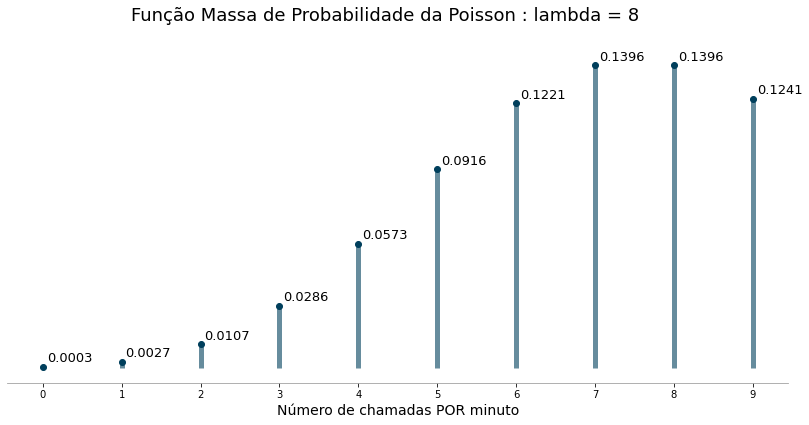

In [11]:
fig, ax = plt.subplots(figsize=(14,6), dpi=72)
x = np.arange(0,k+1)
y = poisson.pmf(x, lambda_)
ax.plot(x, y, 'o', color=AZUL, ms=6)
ax.vlines(x, 0, y, colors=AZUL, lw=5, alpha=0.6)

ax.spines[['top','right','left']].set_visible(False)

ax.set_yticks([])
ax.spines['bottom'].set_color(CINZA)

ax.set_xlabel("Número de chamadas POR minuto", fontsize=14)
ax.set_xticks(range(k+1), labels=range(k+1))

for i in range(len(x)):
  y = poisson.pmf(i,lambda_)
  ax.annotate(f'{np.round(y,4)}', #texto do rótulo
                xy=(i,y), #Ponto (x,y) do rótulo
                xytext=(4,5), #distãncia relativa do rótulo ao ponto onde ele foi definido
                textcoords='offset points',
                # color=CINZA_TEXTO,
                fontsize=13,
                fontweight='medium')


fig.text(0.5, 0.90,f'Função Massa de Probabilidade da Poisson : lambda = {lambda_}\n',
         fontweight='medium', fontsize=18, ha='center');

<br>

### Algumas considerações que observei para **λ = 8**



- A Poisson é uma distribuição discreta caracterizada por ter sua **média e variância iguais a λ**. Portanto, neste caso, **média = variância = 8**, o que indica que o número de eventos tende a se concentrar em torno de 8, mas com alguma variabilidade.

- As maiores probabilidades ocorrem entre os valores **k = 7 e k = 8**.

- À medida que o valor de λ aumenta, a distribuição de Poisson se torna **mais simétrica** e passa a se parecer com uma **distribuição normal discreta**. Com λ = 8, já observamos essa tendência à simetria. 

- O intervalo entre **k = 6 e k = 10** concentra a maior parte da probabilidade, o que indica que a variabilidade do número de eventos ao redor da média é relativamente pequena.

- Por fim, a distribuição também apresenta **caudas leves**, ou seja, a chance de ocorrerem valores muito distantes da média (por exemplo, k < 3 ou k > 12) é bastante baixa.



### Função de distribuição acumulada

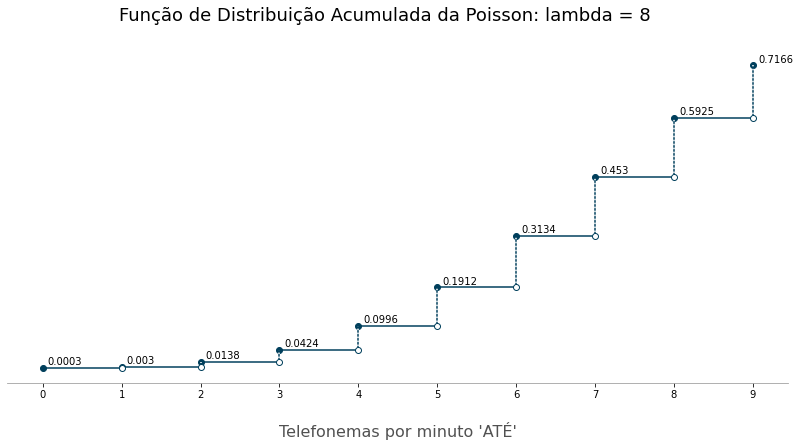

In [12]:
fig, ax = plt.subplots(figsize=(14,6), dpi = 72)

x = np.arange(0,k+1)
y = poisson.cdf(x, lambda_)

ax.step(x, y, where='post', marker='o', color=AZUL, markersize=6)
ax.plot(x[1:], y[:-1], marker='o', markersize=6, color=AZUL , markerfacecolor='white', linestyle='None')

#Artifício para criar linhas verticais pontilhadas
for i in range(len(x)-1):
    ax.vlines(x[i+1], y[i], y[i+1], linestyles='dotted', colors='w')


ax.spines[['left','top','right']].set_visible(False)
ax.spines['bottom'].set_color(CINZA)

ax.set_yticks(ticks=[])

ax.set_xticks(ticks=x, labels=x)

# for x,y in zip(x,y):
    # ax.annotate(text = f'{np.round(y,4)}',
    #            xy=(x,y), 
    #             xytext=(5,3), 
    #             textcoords='offset points',)

for i in range(len(x)):
    y = poisson.cdf(i, lambda_)
    ax.annotate(text = f'{np.round(y,4)}',xy=(i,y), xytext=(5,3), textcoords='offset points',)
    

fig.text(0.5,0.9,f"Função de Distribuição Acumulada da Poisson: lambda = {lambda_}\n", fontweight='medium', fontsize=18, ha='center');
ax.set_xlabel(f"\nTelefonemas por minuto 'ATÉ'", fontsize=16);
